# Definitions

## Parameters

In [35]:
!pip --version

pip 22.0.4 from /Users/r2/Code/ukraine-media/.venv/lib/python3.10/site-packages/pip (python 3.10)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import os
from matplotlib.dates import DateFormatter
%matplotlib inline
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 13
mpl.rcParams["xtick.labelsize"] = 13
mpl.rcParams["ytick.labelsize"] = 13
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = "medium"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


## Data

In [37]:
sources = ["AP", "Fox", "CNN", "ABC", "CBS", "NYT", "Mirror", "Reuters", "Express", "HuffPost", "Guardian", "DailyMail", "All"]
data_dfs = [pd.read_csv(os.path.join(ROOT_DIR, "results", i + "_Results.csv"), parse_dates=["Date"], index_col=["Date"]) for i in sources]
davg_dfs = [data_df.drop(columns=["Title", "Text", "URL", "Topic"]).resample("D").mean() for data_df in data_dfs]
ntr_dfs = [pd.read_table(os.path.join(ROOT_DIR, "results", i + "_NovelTransReson.txt"), sep=" ", header=None, names=["Novelty", "Transience", "Resonance"]) for i in sources]
dcount_dfs = [data_df.resample("D").apply({"URL": "count"}) for data_df in data_dfs]

date_start,date_end = '2022-03-01','2022-08-01'

## Line Plots

In [67]:
def line_plot_resonance(data, title, xlabel="", ylabel=""):

    fig, ax = plt.subplots(figsize=(25, 2.5))

    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2021, 11, 1)
    end = dt.date.today()

    ax.plot(
        data.index.values,
        data["Resonance"],
        color="black",
        linewidth=1,
    )

    ax.vlines(x=[date_start,date_end], ymin=-2.5, ymax=2.5, color="k", linewidth=1.5, linestyle=":")

    ax.set(
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        xbound=(beginning, end),
        ylim=[-1, 1.001],
    )

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks([-1,0,1])

    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")

    return fig

def line_plot_resonance_all(data, title, xlabel="", ylabel=""):

    fig, ax = plt.subplots(figsize=(25, 2.5))

    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2021, 11, 1)
    end = dt.date.today()

    ax.plot(
        data.index.values,
        data["Resonance"],
        color="black",
        linewidth=1,
    )

    ax.vlines(x=[date_start,date_end], ymin=-2.5, ymax=2.5, color="k", linewidth=1.5, linestyle=":")
    ax.vlines(x=[
        '2022-07-25', '2022-07-25', '2022-07-25', '2022-07-26', '2022-07-26', '2022-07-25', '2022-07-25', '2022-07-25', '2022-07-25', '2022-09-12', '2022-07-26', '2022-07-25', '2022-09-12', '2022-09-12', '2022-09-12', '2022-09-12', '2022-07-25', '2022-09-12', '2022-07-25', '2022-11-16', '2022-11-16', '2022-09-12', '2022-07-25', '2022-09-12', '2022-11-16', '2022-11-16', '2022-07-25', '2022-07-05', '2022-09-13', '2022-09-12', '2022-07-05', '2022-09-12', '2022-07-05', '2022-09-12', '2022-07-05', '2022-09-12', '2022-07-25', '2022-07-25', '2022-09-13', '2022-09-12', '2022-09-12', '2022-07-25', '2022-09-13', '2022-10-24', '2022-09-13', '2022-07-26', '2022-09-13', '2022-09-13', '2022-11-16', '2022-04-29'
        ], ymin=-2.5, ymax=2.5, color="red", linewidth=1.5, linestyle=":")
    ax.vlines(x=[
        '2022-04-01', '2022-07-01', '2022-07-01', '2022-10-14', '2022-07-01', '2022-07-21', '2022-03-13', '2022-05-27', '2022-09-08', '2022-05-26', '2022-10-14', '2022-09-08', '2022-05-26', '2022-03-01', '2022-04-29', '2022-07-01', '2022-09-08', '2022-04-01', '2022-09-08', '2022-05-27', '2022-07-22', '2022-07-22', '2022-09-09', '2022-03-01', '2022-04-01', '2022-10-21', '2022-03-13', '2022-03-25', '2022-07-01', '2022-03-25', '2022-03-01', '2022-03-13', '2022-03-25', '2022-05-26', '2022-09-09', '2022-09-09', '2022-04-29', '2022-07-29', '2022-07-02', '2022-09-08', '2022-03-01', '2022-03-25', '2022-07-29', '2022-09-09', '2022-07-01', '2022-09-10', '2022-07-01', '2022-09-09', '2022-07-22', '2022-07-22'
        ], ymin=-2.5, ymax=2.5, color="blue", linewidth=1.5, linestyle=":")

    ax.set(
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        xbound=(beginning, end),
        ylim=[-1, 1.001],
    )

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks([-1,0,1])

    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")

    return fig


def multi_line_plot_resonance(list, title):

    color_list = ["red", "lawngreen", "gold", "dodgerblue", "blueviolet", "magenta", "slategray", "black", "midnightblue", "darkgreen", "saddlebrown", "lightcoral"]
    fig, ax = plt.subplots(figsize=(25, 2.5))

    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2021, 11, 1)
    end = dt.date.today()

    for data, color in zip(list, color_list):
        ax.plot(
            data.index.values,
            data["Resonance"],
            color="black",
            linewidth=1,
            alpha=0.3,
        )

    ax.vlines(x=[date_start,date_end ], ymin=-2.5, ymax=2.5, color="k", linewidth=1.5, linestyle=":")

    ax.set(
        title=title,
        xbound=(beginning, end),
        ylim=[-1, 1.0001],
    )

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks([-1,0,1])

    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")

    return fig


def line_plot_count(data, title, xlabel="", ylabel=""):

    fig, ax = plt.subplots(figsize=(25, 2.5))
    fig.canvas.draw()

    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2021, 11, 1)
    end = dt.date.today()

    ax.plot(
        data.index.values,
        data["URL"],
        color="black",
        linewidth=1,
    )

    ax.set(
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        xbound=(beginning, end),
    )

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, end / 5))

    ticksx = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticksx[0].set_horizontalalignment("left")

    ticksy = ["{i:.0f}".format(i=item) for item in ax.get_yticks()]
    ticksy[0] = "0"
    ax.set_yticklabels(ticksy)

    return fig


## Density plots

In [39]:
def plot_quants_2Dhist(quants, DATA_NTR, fig, ax, xbins, ybins, make_cbar=True, cbar_axis=False, cbar_orientation="vertical", colorvmax=None):

    q0 = DATA_NTR[quants[0]]  # ["Novelty", "Resonance"][0]
    q1 = DATA_NTR[quants[1]]

    q0bins = xbins
    q1bins = ybins

    H, xedges, yedges = np.histogram2d(q0.to_numpy(), q1.to_numpy(), bins=[q0bins, q1bins])

    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)

    # Mask zeros
    Hmasked = np.ma.masked_where(H == 0, H)  # Mask pixels with a value

    # Plot 2D histogram using pcolor
    if colorvmax:
        usemax = colorvmax
    else:
        usemax = H.max()
    pcolm = ax.pcolormesh(xedges, yedges, Hmasked, norm=mpl.colors.LogNorm(vmin=1, vmax=usemax))

    if make_cbar:
        if cbar_axis:
            cbar = fig.colorbar(pcolm, cax=cbar_axis, orientation=cbar_orientation)
        else:
            cbar = fig.colorbar(pcolm, ax=ax, orientation=cbar_orientation)
        cbar.ax.set_ylabel("counts")

    ax.set_xlabel(quants[0])
    ax.set_ylabel(quants[1])

    if make_cbar:
        return H, cbar
    else:
        return H


In [40]:
def tvn_plot(source, name, n):

    fig = plt.figure(figsize=(4.5, 2.5))

    ########################################################## Plot Transience v. Novelty ##########################################################

    # Formato Eixos
    ax = fig.add_axes([0, 0.19, 0.4, 0.72])  # Dist do Y, Dist do X, largura, altura do grafico

    # Formato Cbar
    cbaxes = fig.add_axes([0.4, 0.29, 0.025, 0.5])  # Dist do Y, Dist do X, largura, altura da cbar

    # Colunas
    quants = ["Novelty", "Transience"]

    # Quadrados (bins)
    xbins = np.linspace(0, 10, 30)
    ybins = np.linspace(0, 10, 30)

    ## Gerando gráfico
    H, cbar = plot_quants_2Dhist(quants, source, fig, ax, xbins, ybins, make_cbar=True, cbar_axis=cbaxes, cbar_orientation="vertical")

    # Titulo
    ax.set_title(f"{name}\nTransience v. Novelty\n(n = {n})", x=0.5, y=1)

    # Colorbar
    cbar.ax.set_ylabel("")  # Sem label no Y
    cbar.ax.set_xlabel("")  # Sem label no X
    cbar.ax.yaxis.set_ticks_position("right")  # Posicaoo ticks
    cbar.ax.tick_params(labelsize=10)

    # Linha X=Y
    ax.plot([0, 10], [0, 10], color="k", linewidth=1.5, linestyle=":")

    # Legenda
    # ax.legend([mpl.lines.Line2D([0], [0], color="k", linewidth=1.5, linestyle="--")], ["x=y"], loc="upper center", fontsize=8, ncol=2, handlelength=2.7)

    # Eixo X
    ax.set_xlabel("Novelty $\mathcal{N}$")
    ax.set_xlim(0, 11.5)  # Escala do eixo X
    ax.set_xticks([0, 2, 4, 6, 8, 10])  # Numeros de interesse eixo
    ax.xaxis.set_ticks_position("bottom")  # Ticks embaixo
    ax.spines["bottom"].set_bounds(0, 10)  # Delimita eixo
    ax.spines["top"].set_visible(False)  # Oculta eixo superior

    # Eixo Y
    ax.set_ylabel("Transience $\mathcal{T}$")
    ax.set_ylim(0, 11.5)  # Escala do eixo Y
    ax.set_yticks([0, 2, 4, 6, 8, 10])  # Numeros de interesse eixo
    ax.yaxis.set_ticks_position("left")  # Ticks na esquerda
    ax.spines["left"].set_bounds(0, 10)  # Delimita eixo
    ax.spines["right"].set_visible(False)  # Oculta eixo direito
    ax.tick_params(labelsize=11)

    ########################################################## Plot Resonance v. Novelty ##########################################################

    # Formato Eixos
    ax = fig.add_axes([0.7, 0.19, 0.35, 0.65])  # Dist do Y, Dist do X, largura, altura do grafico

    # Formato Cbar
    cbaxes = fig.add_axes([1.1, 0.29, 0.025, 0.5])  # Dist do Y, Dist do X, largura, altura da cbar

    # Colunas
    quants = ["Novelty", "Resonance"]

    # Quadrados (bins)
    xbins = np.linspace(0, 11, 30)  # Range dos quadrados em X, larguras
    ybins = np.linspace(-7, 8, 30)  # Range dos quadrados em Y, alturas

    ## Gerando gráfico
    H, cbar = plot_quants_2Dhist(quants, source, fig, ax, xbins, ybins, make_cbar=True, cbar_axis=cbaxes, cbar_orientation="vertical")

    # Titulo
    ax.set_title(f"{name}\nResonance v. Novelty\n(n = {n})", x=0.5, y=1.1)

    # Linha pontilhada
    ax.axhline(color="k", linewidth=1.5, linestyle=":")

    # Colorbar
    cbar.ax.set_ylabel("")  # Sem label no Y
    cbar.ax.set_xlabel("")  # Sem label no X
    cbar.ax.yaxis.set_ticks_position("right")  # Posicao ticks
    cbar.ax.tick_params(labelsize=10)  # Tamanho numeros ticks

    # Eixo X
    ax.set_xlabel("Novelty $\mathcal{N}$")
    ax.set_xlim(-1, 10)  # Escala do eixo X
    ax.set_xticks([0, 2, 4, 6, 8, 10])  # Numeros de interesse eixo
    ax.xaxis.set_ticks_position("bottom")  # Ticks embaixo
    ax.spines["bottom"].set_bounds(0, 10)  # Delimita eixo
    ax.spines["top"].set_visible(False)  # Oculta eixo superior

    # Eixo Y
    ax.set_ylabel("Resonance $\mathcal{R}}$")
    ax.set_ylim(-7, 8)  # Escala do eixo Y
    ax.set_yticks([-6, -3, 0, 3, 6])  # Numeros de interesse eixo
    ax.yaxis.set_ticks_position("left")  # Ticks na esquerda
    ax.spines["left"].set_bounds(-6, 6)  # Delimita eixo
    ax.spines["right"].set_visible(False)  # Oculta eixo direito
    ax.tick_params(labelsize=11)

    return fig


## Scatter Plots

In [41]:
def scatter_resonance(sources,date_start,date_end):
    avg_novelties, avg_resonances,names = [],[],[]
    
    for name in sources:
        if name == "All":
            continue
        names.append(name)
        i = pd.read_csv(os.path.join(ROOT_DIR, "results", name + "_Results.csv"))
        i['Date'] = pd.to_datetime(i['Date'])
        df_split = i.loc[(i['Date'] >= date_start) & (i['Date'] < date_end)]
        novelty = df_split["Novelty"].to_list()
        resonance = df_split["Resonance"].to_list()
        avg_novelties.append(sum(novelty)/len(novelty))
        avg_resonances.append(sum(resonance)/len(resonance))

    avg_novelty = sum(avg_novelties)/len(avg_novelties)
    avg_resonance = sum(avg_resonances)/len(avg_resonances)

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 7)

    plt.scatter(avg_resonances,avg_novelties,marker=".",color='black')
    min_resonance, max_resonance = ax.get_xlim()
    min_novelty, max_novelty = ax.get_ylim()

    plt.plot([min_resonance,2*avg_resonance-min_resonance],[avg_novelty,avg_novelty],'k', linestyle = ":", lw=1)
    plt.plot([avg_resonance,avg_resonance],[min_novelty,2*avg_novelty-min_novelty],'k', linestyle = ":", lw=1)

    
    ax.set_title("Novelty X Resonance - Averages")
    ax.set_xlabel("Resonance")
    ax.set_ylabel("Novelty")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for i, txt in enumerate(names):
        ax.annotate(txt, (avg_resonances[i]+0.0005, avg_novelties[i]-0.05))

    return fig


## Violin Plots

In [42]:
def violin(cmap,metric,sources,date_start,date_end):
    from mycolorpy import colorlist as mcp

    def set_axis_style(ax, labels):
        ax.get_yaxis().set_tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_yticks(np.arange(1, len(labels) + 1))
        ax.set_yticklabels(labels)
        ax.set_ylim(0.25, len(labels) + 0.75)

    novelties,resonances = [],[]
    avg_novelties, avg_resonances,names = [],[],[]
    
    for name in sources:
        if name == "All":
            continue
        names.append(name)
        i = pd.read_csv(os.path.join(ROOT_DIR, "results", name + "_Results.csv"))
        i['Date'] = pd.to_datetime(i['Date'])
        df_split = i.loc[(i['Date'] >= date_start) & (i['Date'] < date_end)]
        novelty = df_split["Novelty"].to_list()
        novelties.append(novelty)
        resonance = df_split["Resonance"].to_list()
        resonances.append(resonance)
        avg_novelties.append(sum(novelty)/len(novelty))
        avg_resonances.append(sum(resonance)/len(resonance))

    avg_novelty = sum(avg_novelties)/len(avg_novelties)
    avg_resonance = sum(avg_resonances)/len(avg_resonances)

    df = pd.DataFrame(list(zip(names, novelties, resonances, avg_novelties, avg_resonances)), columns =['Name', 'Novelty','Resonance','Avg_Novelty','Avg_Resonance'])
    df_sorted = df.sort_values(by="Avg_"+str(metric))

    fs = 10  # fontsize
    data = novelties

    fig, ax = plt.subplots(figsize=(6, 10))

    plot = ax.violinplot(df_sorted[metric], points=200, vert=False, widths=0.8,
                        showmeans=True, showextrema=True, showmedians=False,
                        bw_method=0.5)

    if metric == "Novelty":
        title = "Novelties - Violin - Mean and Extrema"
    else:
        title = "Resonances - Violin - Mean and Extrema"
    ax.set_title(title)

    set_axis_style(ax, df_sorted["Name"])

    colors=mcp.gen_color(cmap,n=12)
    for i, pc in enumerate(plot["bodies"], 1):
            pc.set_linewidth(0.1)
            pc.set_edgecolor('black')
            pc.set_alpha(0.6)
            pc.set_facecolor(colors[i-1])

    w=1
    plot["cmeans"].set_color('#303030')
    plot["cmins"].set_color('#3d3d3d')
    plot["cmaxes"].set_color('#3d3d3d')
    plot["cbars"].set_color('#3d3d3d')
    plot["cmeans"].set_linewidth(1.3)
    plot["cmins"].set_linewidth(w)
    plot["cmaxes"].set_linewidth(w)
    plot["cbars"].set_linewidth(w)
    
    
    plt.show()

    return fig


## Histograms

In [55]:
def topic_histograms(data):
    my_dict = {}
    for i in range(0,30):
        length = len(data[data['Topic'] == i])
        my_dict[str(i)] = length

    fig, ax = plt.subplots(figsize=(15, 5))

    plt.bar(my_dict.keys(), my_dict.values(), color='grey')

# Plots

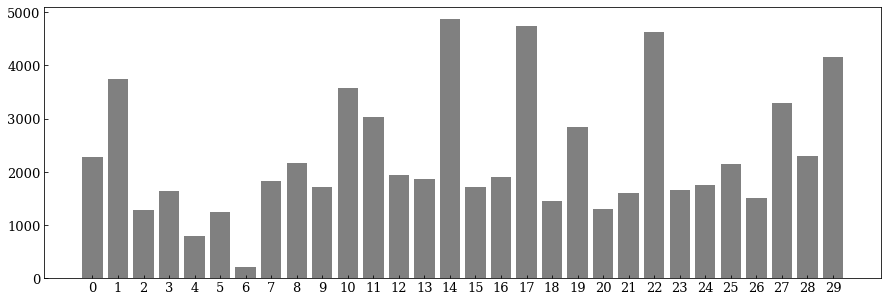

In [56]:
for i in range(0,len(sources)):
    if sources[i] == "All":
        topic_histograms(data_dfs[i])
        break

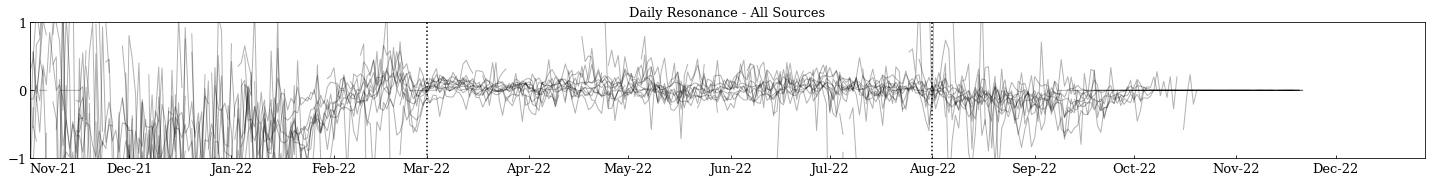

In [68]:
fig = multi_line_plot_resonance(davg_dfs, "Daily Resonance - All Sources")
fig.savefig(os.path.join(ROOT_DIR, "figures", "Resonances_Multiline.svg"), format="svg", dpi=1000, bbox_inches="tight")


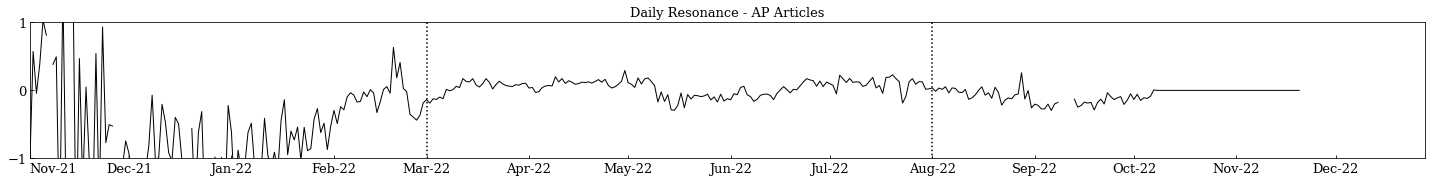

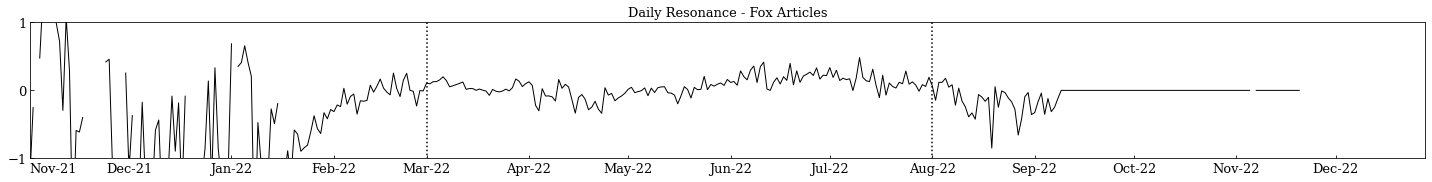

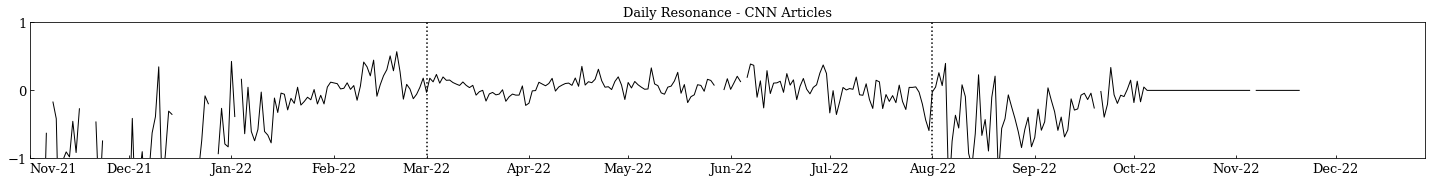

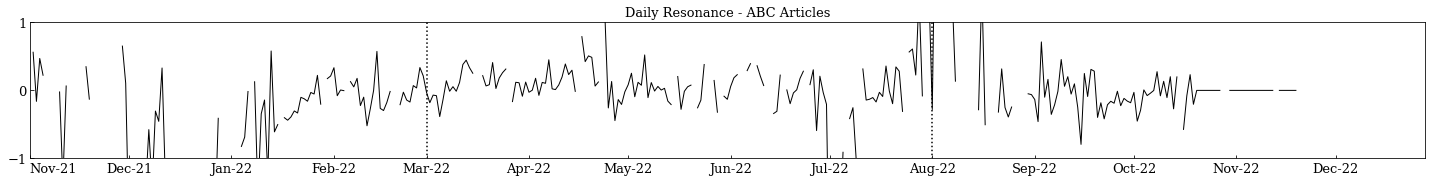

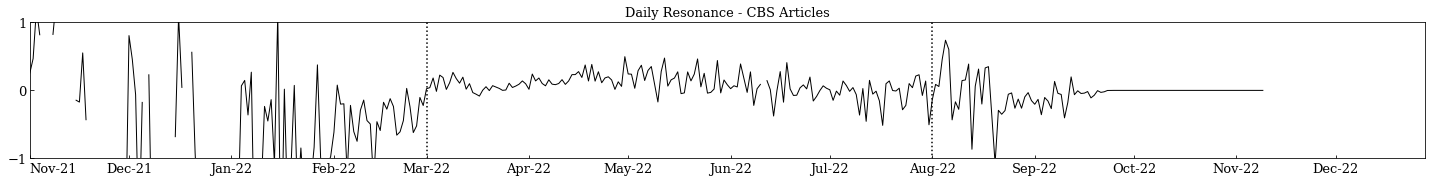

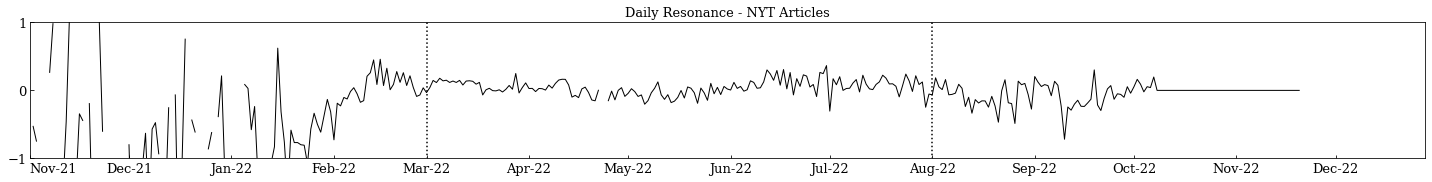

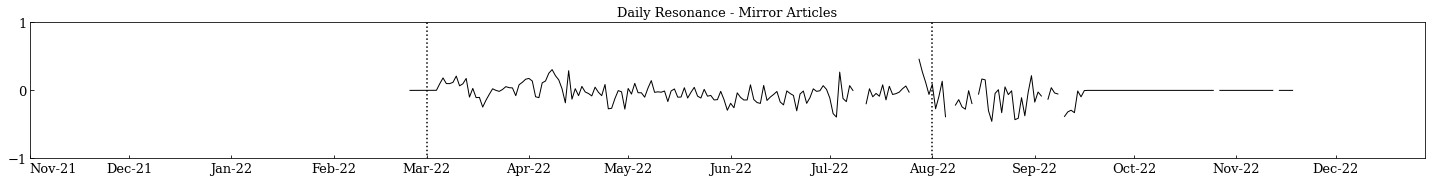

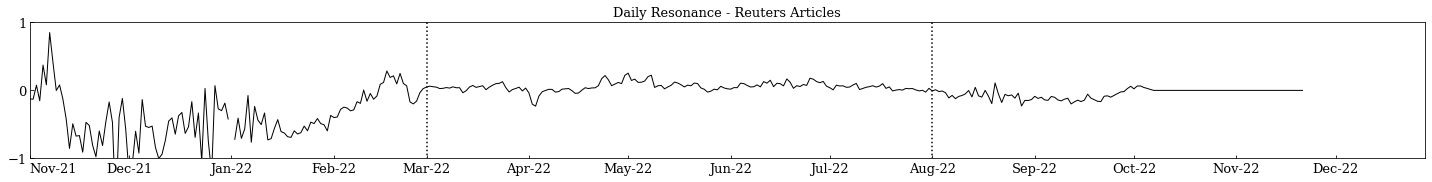

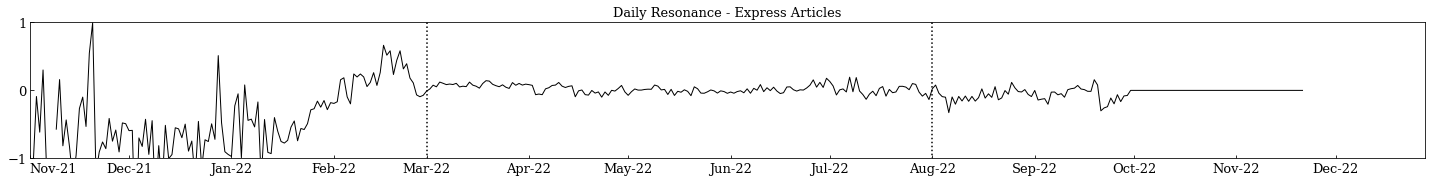

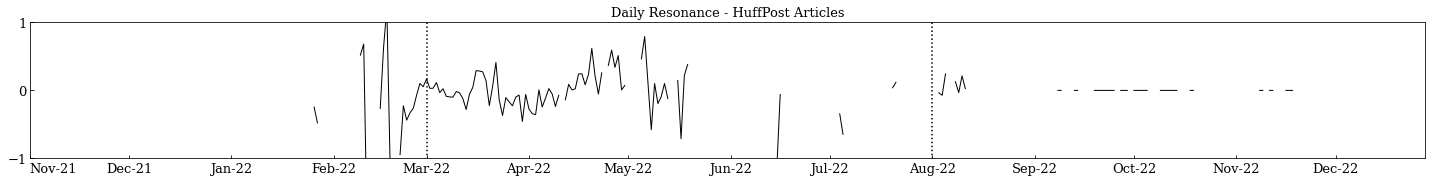

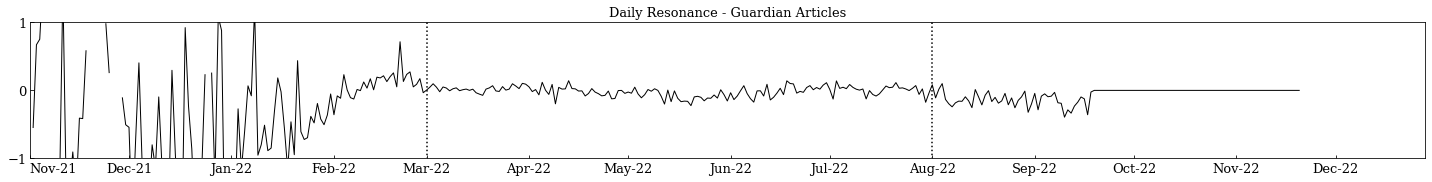

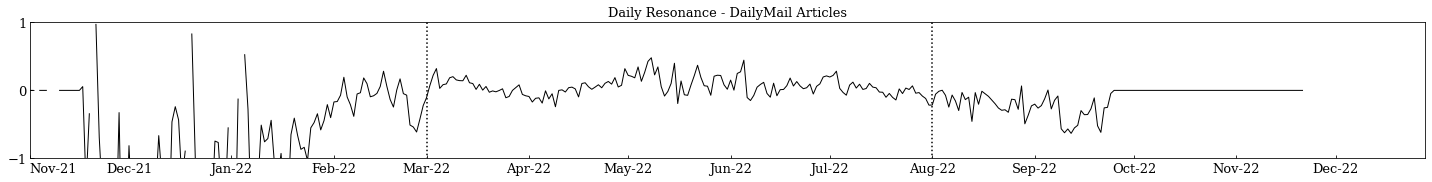

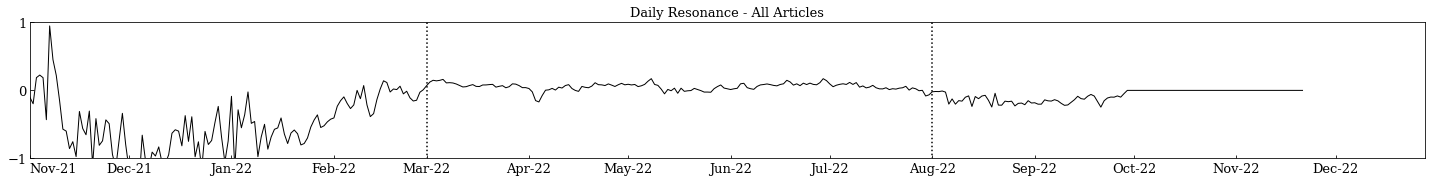

In [69]:
for i in range(0, len(sources)):
    fig = line_plot_resonance(davg_dfs[i], f"Daily Resonance - {sources[i]} Articles")
    fig.savefig(os.path.join(ROOT_DIR, "figures", sources[i]+"_Resonance_Daily.svg"), format="svg", dpi=1000, bbox_inches="tight")


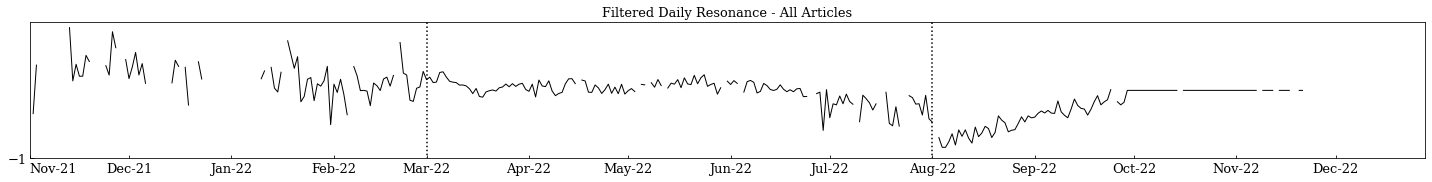

In [47]:
for data_df in data_dfs:
    if data_df.iloc[0,0][:4] != "http":
        data_df2 = data_df.query("Topic == 2 | Topic == 3")
        davg_df = data_df2.drop(columns=["Title", "Text", "URL", "Topic"]).resample("D").mean()
        fig = line_plot_resonance(davg_df, f"Filtered Daily Resonance - All Articles")
        fig.savefig(os.path.join(ROOT_DIR, "figures", "Filtered_All_Resonance_Daily.svg"), format="svg", dpi=1000, bbox_inches="tight")

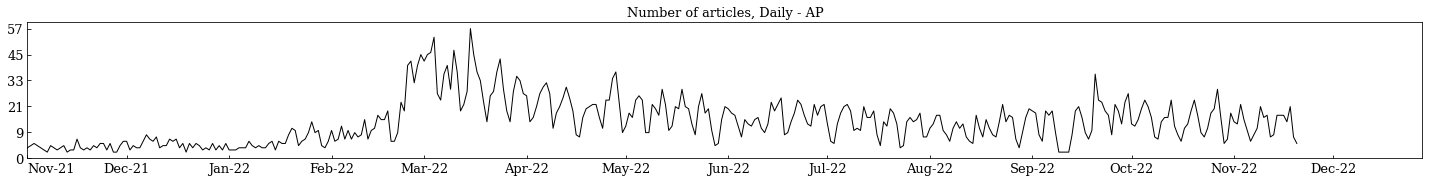

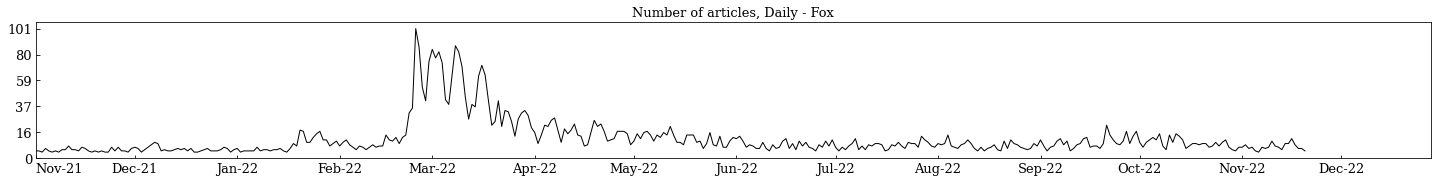

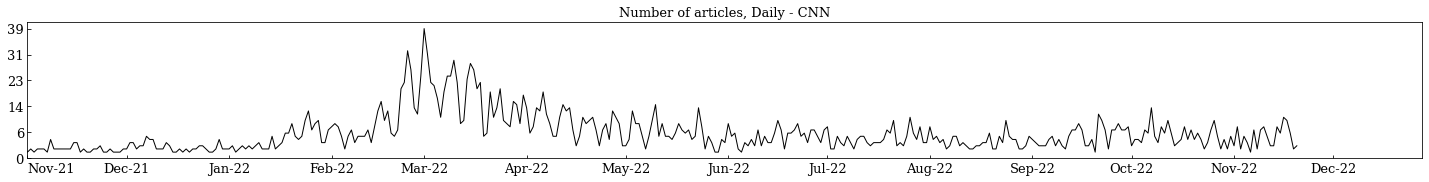

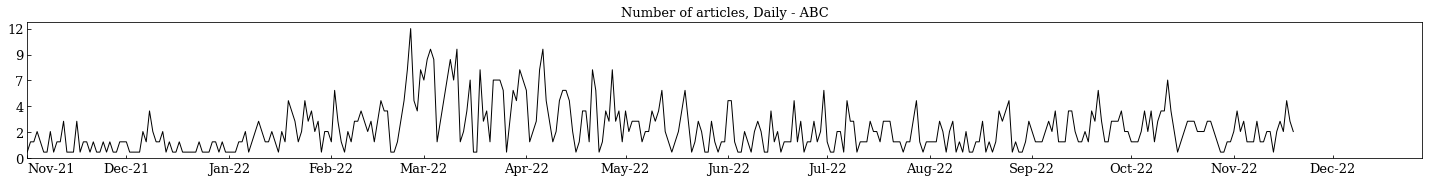

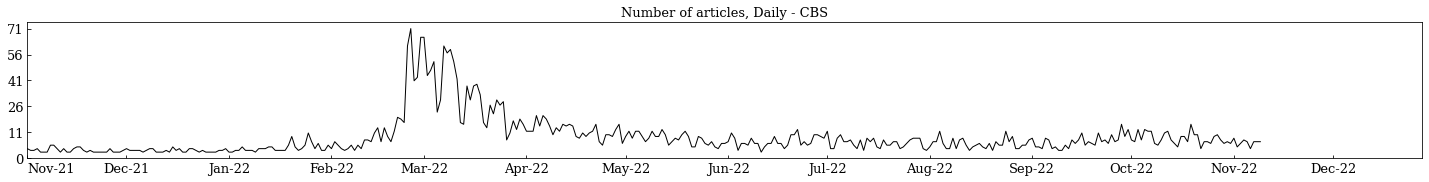

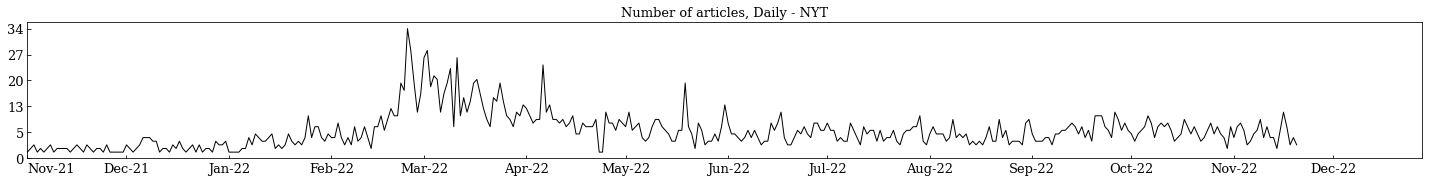

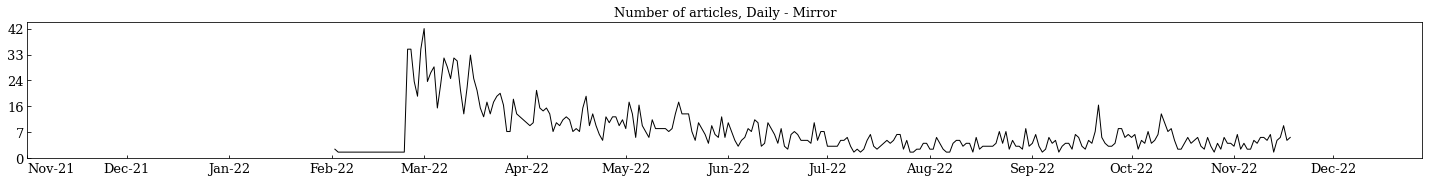

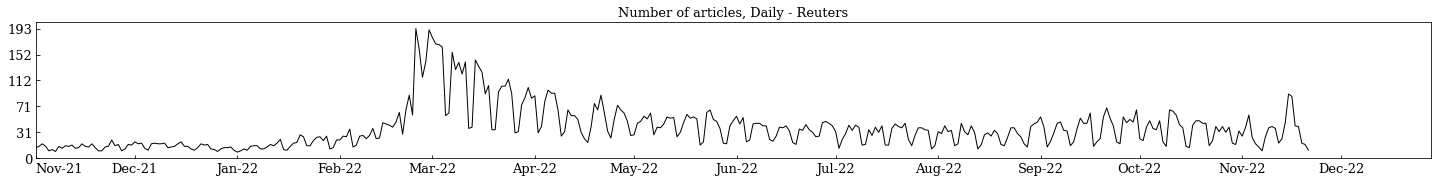

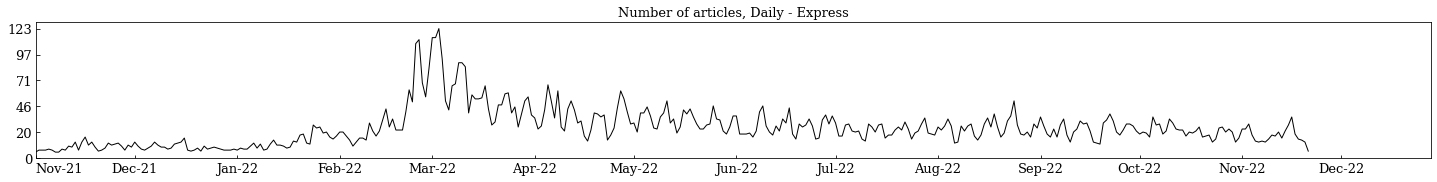

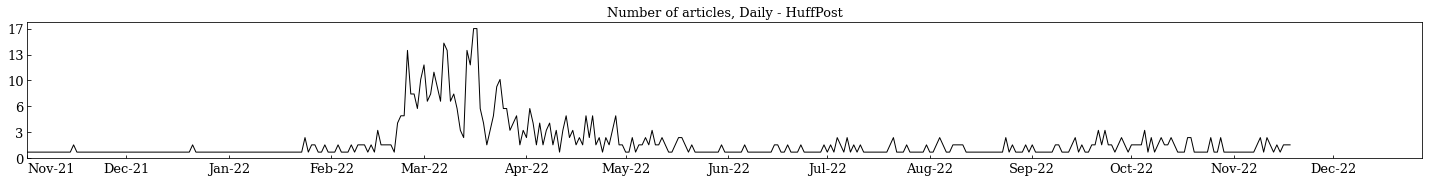

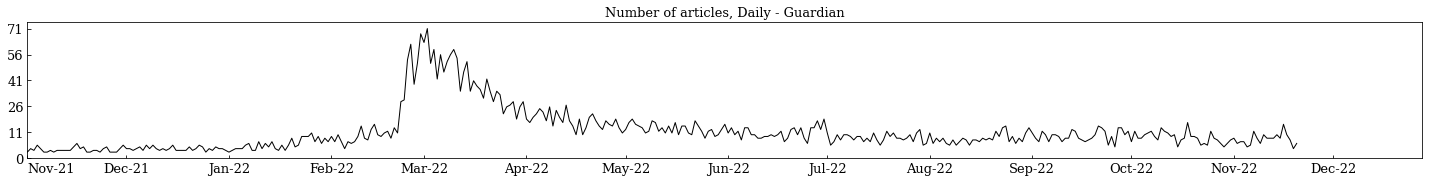

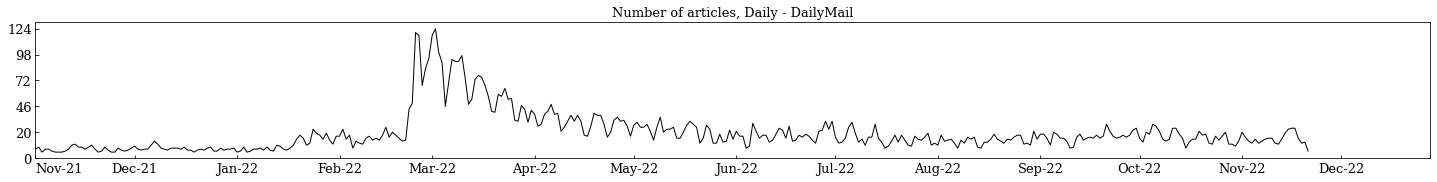

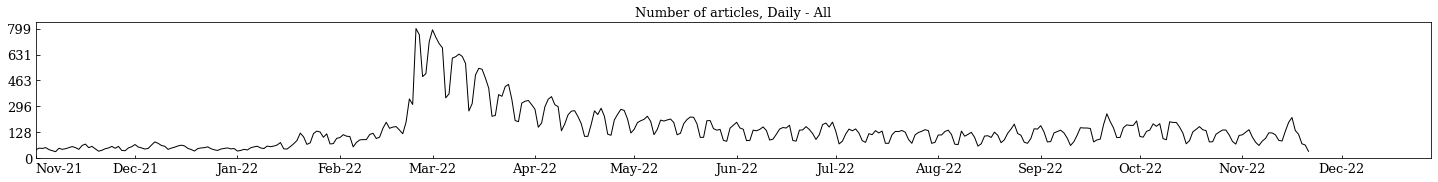

In [48]:
for i in range(0, len(sources)):
    fig = line_plot_count(dcount_dfs[i], f"Number of articles, Daily - {sources[i]}")
    fig.savefig(os.path.join(ROOT_DIR, "figures", sources[i]+"Count_Daily.svg"), format="svg", dpi=1000, bbox_inches="tight")


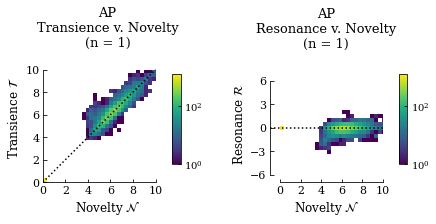

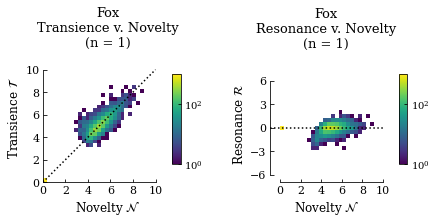

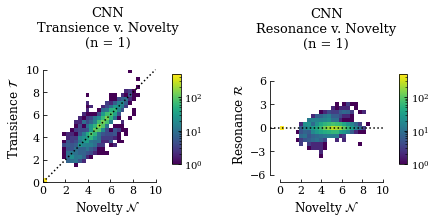

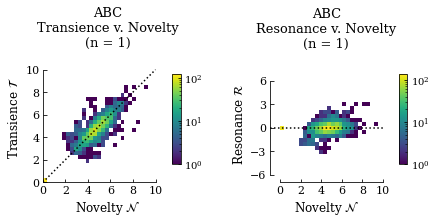

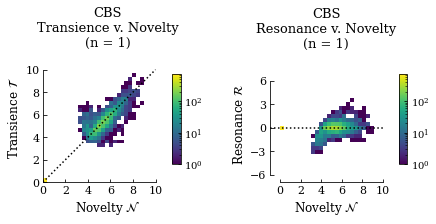

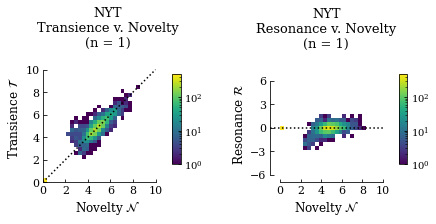

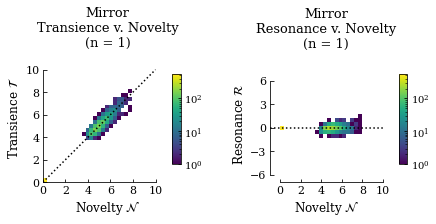

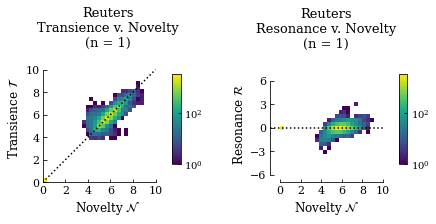

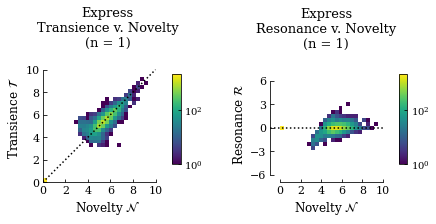

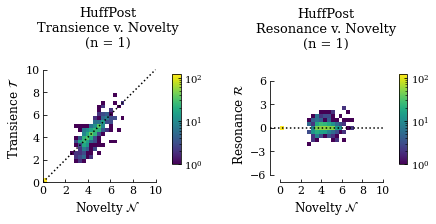

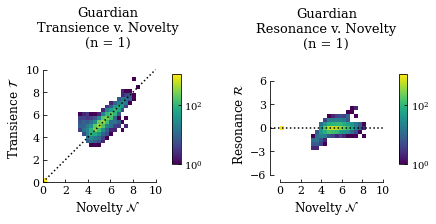

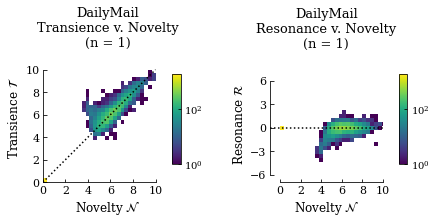

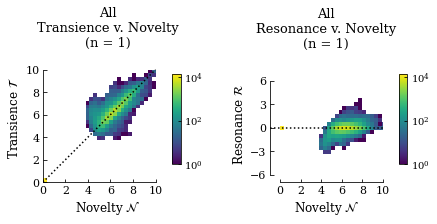

In [49]:
for name, data in zip(sources, ntr_dfs):
    fig = tvn_plot(data, name, 1)
    fig.savefig(os.path.join(ROOT_DIR, "figures", name + "_TvN.svg"), format="svg", dpi=1000, bbox_inches="tight")


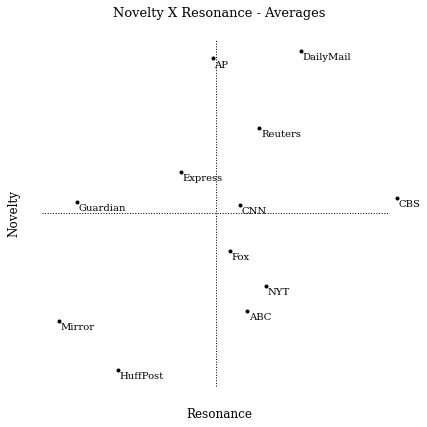

In [50]:
fig = scatter_resonance(sources,date_start,date_end )
fig.savefig(os.path.join(ROOT_DIR, "figures", "Scatter_NvR.svg"), format="svg", dpi=1000, bbox_inches="tight")

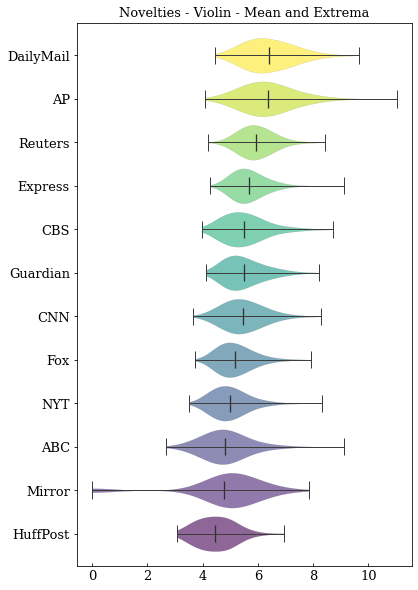

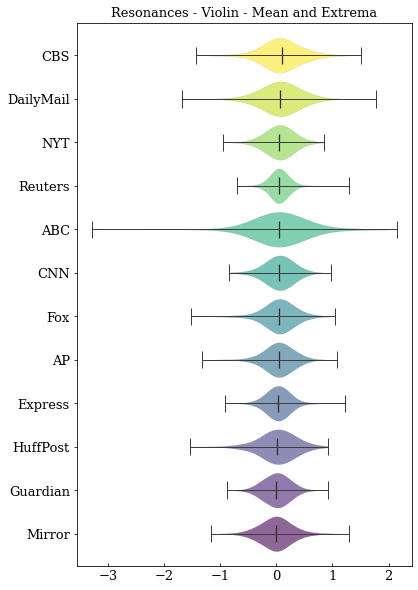

In [51]:
fig1 = violin("viridis","Novelty",sources,date_start,date_end )
fig1.savefig(os.path.join(ROOT_DIR, "figures", "Novelties_Violin.svg"), format="svg", dpi=1000, bbox_inches="tight")

fig2 = violin("viridis","Resonance",sources,date_start,date_end )
fig2.savefig(os.path.join(ROOT_DIR, "figures", "Resonances_Violin.svg"), format="svg", dpi=1000, bbox_inches="tight")